In [35]:
import os
import mlflow
import pickle
import argparse
import numpy as np
import pandas as pd

from auxiliary import log_dir_name

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

In [62]:
def plot_history(history):

    loss = history['loss']
    accuracy = history['accuracy']

    dev_loss = history['val_loss']
    dev_accuracy = history['val_accuracy']

    epochs = len(loss)
    X = np.arange(epochs)

    fig, axes = plt.subplots(figsize=(16, 6), ncols=2)

    ax = axes[0]
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.plot(X, loss, '-', marker='o')
    ax.plot(X, dev_loss, '-', marker='s')

    ax = axes[1]
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.plot(X, accuracy, '-', marker='o')
    ax.plot(X, dev_accuracy, '-', marker='s')

    plt.tight_layout()
    plt.show()
    
def print_results(history):
    
    print('Resultados para train')
    print('Accuracy = {:.4f}'.format(history['accuracy'][-1]))
    print('Loss     = {:.4f}'.format(history['loss'][-1]))
    print('')

    print('Resultados para dev')
    print('Accuracy = {:.4f}'.format(history['val_accuracy'][-1]))
    print('Loss     = {:.4f}'.format(history['val_loss'][-1]))

## Ejercicio 1

1. Construir un pipeline de clasificación con un modelo Keras MLP. Pueden comenzar con una versión simplicada que sólo tenga una capa de Input donde pasen los valores de las columnas de *one-hot-encodings*.

2. Entrenar uno o varios modelos (con dos o tres es suficiente, veremos más de esto en el práctico 2). Evaluar los modelos en el conjunto de dev y test.

En todos los casos, consideramos los siguiente parámetros por default:

In [92]:
def get_parser():
    parser = argparse.ArgumentParser(
        description='Training a MLP on the petfinder dataset')
    # Here you have some examples of classifier parameters. You can add
    # more arguments or change these if you need to.
    parser.add_argument('--experiment_name', type=str, default='Base model',
                        help='Name of the experiment, used in mlflow.')
    parser.add_argument('--dataset_dir', default='../petfinder_dataset', type=str,
                        help='Directory with the training and test files.')
    parser.add_argument('--hidden_layer_sizes', nargs='+', default=[100], type=int,
                        help='Number of hidden units of each hidden layer.')
    parser.add_argument('--epochs', default=50, type=int,
                        help='Number of epochs to train.')
    parser.add_argument('--dropout', nargs='+', default=[0.5], type=float,
                        help='Dropout ratio for every layer.')
    parser.add_argument('--batch_size', type=int, default=32,
                        help='Number of instances in each batch.')
    parser.add_argument('--learning_rate', default=1e-3, type=float,
                        help='Learning rate.')
    args = parser.parse_args([])

    assert len(args.hidden_layer_sizes) == len(args.dropout)
    return parser

epochs = 50
batch_size = 32
learning_rate = 0.001
dropout = (0.5)
hidden_layer_sizes = (100)

parser = get_parser()
args = parser.parse_args(
    ['--learning_rate', str(learning_rate)]
)

### Primer modelo 

Archivo: `primer_modelo.py`

Este primer modelo incluye sólo las columnas "Gender" y "Color1", codificadas utilizando el método de one-hot-encoding.

Con los parámetros por default el modelo tiene el siguiente| resultado

In [93]:
experiment_name = 'first_base'
dir_name = log_dir_name(args)
history_file = os.path.join('experiments', experiment_name, dir_name, 'history.pickle')
history = pickle.load(open(history_file, 'br'))

print_results(history)

Resultados para train
Accuracy = 0.3032
Loss     = 1.4563

Resultados para dev
Accuracy = 0.2825
Loss     = 1.4666


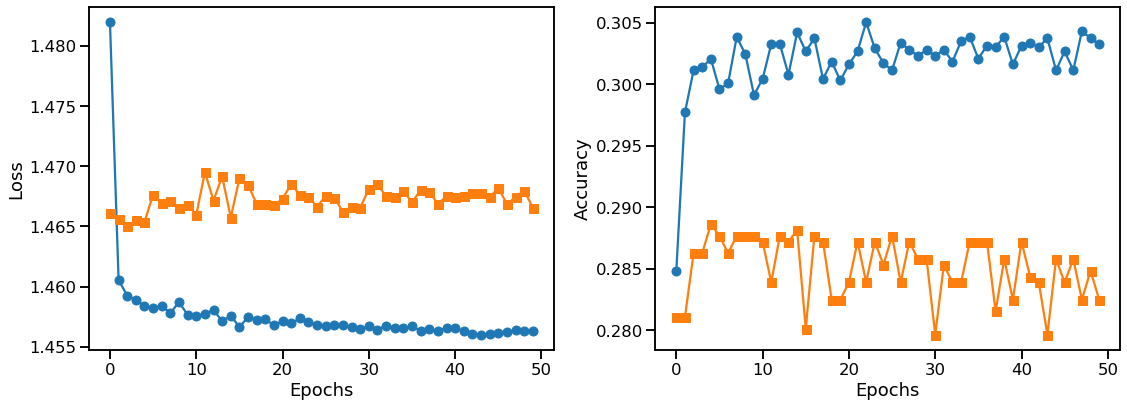

In [94]:
plot_history(history)

### Segundo modelo

Archivo: `segundo_modelo.py`

En este segundo modelo, incorporamos la columna de embedding "Breed1"

In [95]:
experiment_name = 'second_base'
dir_name = log_dir_name(args)
history_file = os.path.join('experiments', experiment_name, dir_name, 'history.pickle')
history = pickle.load(open(history_file, 'br'))

print_results(history)

Resultados para train
Accuracy = 0.3690
Loss     = 1.3378

Resultados para dev
Accuracy = 0.3137
Loss     = 1.5515


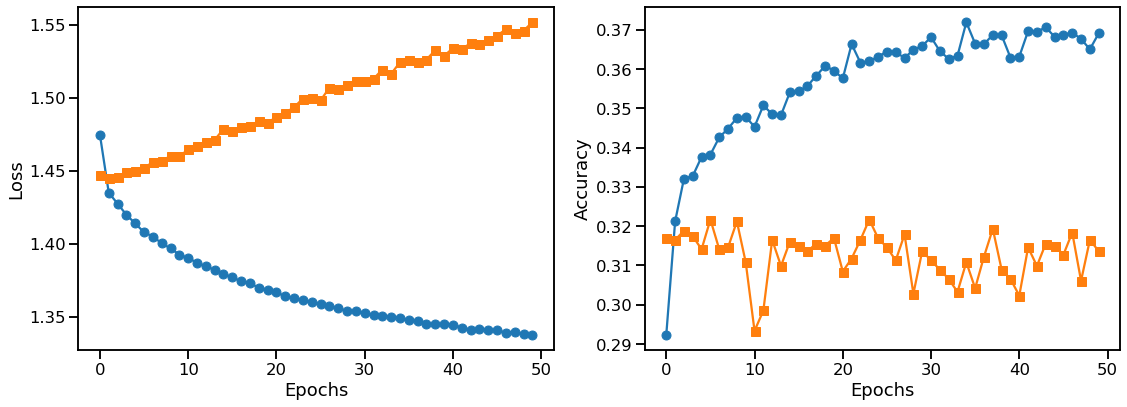

In [96]:
plot_history(history)

### Tercer modelo

Archivo: `tercer_modelo.py`

Sumamos ahora dos columnas numéricas: "Age" y "Fee"

In [97]:
experiment_name = 'third_base'
dir_name = log_dir_name(args)
history_file = os.path.join('experiments', experiment_name, dir_name, 'history.pickle')
history = pickle.load(open(history_file, 'br'))

print_results(history)

Resultados para train
Accuracy = 0.4297
Loss     = 1.2702

Resultados para dev
Accuracy = 0.3344
Loss     = 1.6189


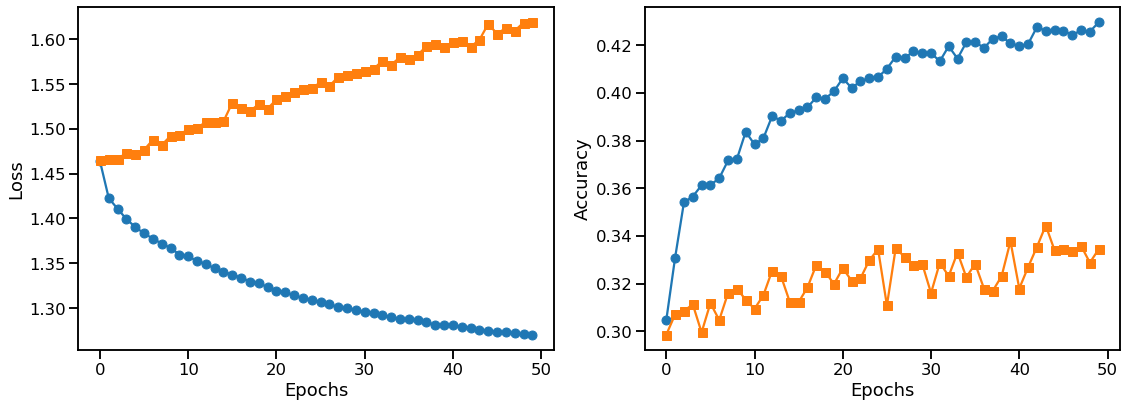

In [98]:
plot_history(history)

De los tres modelos, el mejor parece ser el tercero, y es sobre el cual realizamos una exploración de hiperparámetros

In [112]:
epochs = 50
batch_size = 32
learning_rate = 0.01
dropout = [0.5, 0.5]
hidden_layer_sizes = [100, 100]

parser = get_parser()
args = parser.parse_args(
    ['--learning_rate', str(learning_rate)] +\
    ['--hidden_layer_sizes'] + list(map(str, hidden_layer_sizes)) +\
    ['--dropout'] + list(map(str, dropout))
)

In [115]:
experiment_name = 'third_tuning'
dir_name = log_dir_name(args)
history_file = os.path.join('experiments', experiment_name, dir_name, 'history.pickle')
history = pickle.load(open(history_file, 'br'))

print_results(history)

Resultados para train
Accuracy = 0.4012
Loss     = 1.3247

Resultados para dev
Accuracy = 0.3670
Loss     = 1.5507


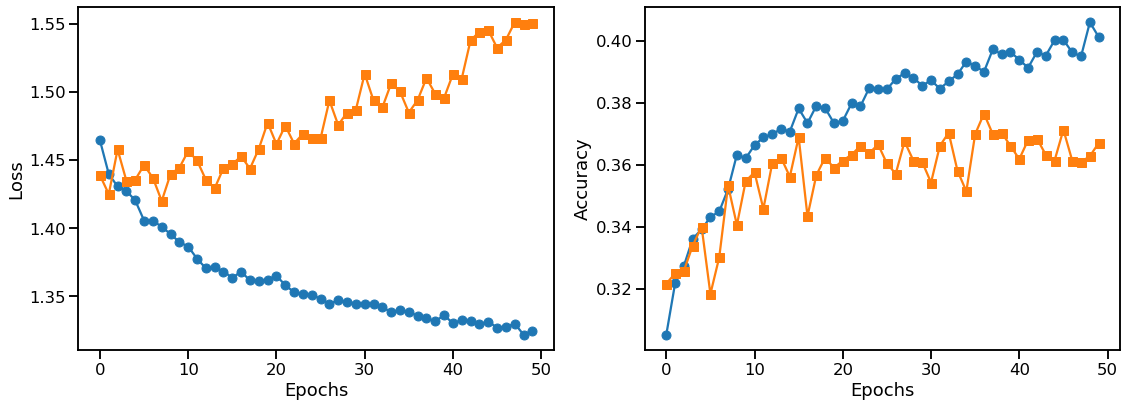

In [116]:
plot_history(history)

## Ejercicio 2

1. Utilizar el mismo modelo anterior y explorar cómo cambian los resultados a medida que agregamos o quitamos columnas.

2. Volver a ejecutar una exploración de hyperparámetros teniendo en cuenta la información que agregan las nuevas columnas.

4. Subir los resultados a la competencia de Kaggle.


Finalmente, tienen que reportar los hyperparámetros y resultados de todos los modelos entrenados. Para esto, pueden utilizar los resultados que recolectan con *mlflow* y procesarlos con una notebook. Tiene que presentar esa notebook o un archivo (pdf|md) con las conclusiones que puedan sacar. Dentro de este reporte tiene que describir:
  * Hyperparámetros con los que procesaron cada columna del dataset. ¿Cuáles son las columnas que más afectan al desempeño? ¿Por qué?
  * Las decisiones tomadas al construir cada modelo: regularización, batch normalization, dropout, número y tamaño de las capas, optimizador.
  * Proceso de entrenamiento: división del train/dev, tamaño del batch, número de épocas, métricas de evaluación. Seleccione los mejores hiperparámetros en función de su rendimiento. El proceso de entrenamiento debería ser el mismo para todos los modelos.
  * Analizar si el clasificador está haciendo overfitting. Esto se puede determinar a partir del resultado del método fit.
